# DSC 680 - Project 2 
# Twitter Sentiment Analysis


### Meenakshi Shankara
### 7/14/2023

In [1]:
#!pip install xgboost -->Successfully installed xgboost-1.5.2
#!pip3 install Pillow==9.5.0
#!pip install clean-text
#!pip3 install googletrans

### Introduction

In this notebook, I am performing a Twitter sentiment analysis of a database of tweets related to specific brands/entities. 
Before building models, the data is cleaned/prepared and pre-processed. I have created visualizations to observe and understand the behavior of data elements.
For building models and comparing them for most accurate prediciton, I will be working with the below modeling algorithms -

Logistic Regression
Random Forest Regression
Decision Tree
Mulitnomial NB 

# 1. Initial data transformation

As an initial approach, all the main libraries and functions were summarized in the following cell, focusing on data visualization, text analysis, text vectorization, and model building.

Additionally, the stopwords from English were downloaded from the `nltk` library.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
pd.options.mode.chained_assignment = None
import os #File location
from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,classification_report

import re #Regular expressions
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\meena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Then, the validation and train datasets were saved on two variables by using the function of `read_csv` from pandas, where both didn't have a data header.

In [3]:
#Validation dataset
val=pd.read_csv("C:/Users/meena/documents/DSC_680/project2/milestone2/data/twitter_validation.csv", header=None)

#Full dataset for Train-Test
train=pd.read_csv("C:/Users/meena/documents/DSC_680/project2/milestone2/data/twitter_training.csv", header=None)

Later, the columns were renamed to represent the given data of tweets. But, with the first 5 rows analysis, it was recognized that positive sentiment was assigned to a "kill" thread related to a videogame. Even with this in consideration, the modeling, in this case, will the same as a traditional NLP project.

In [4]:
train.columns=['Tweet_ID','Entity','Sentiment','Tweet_content']
train.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Then, with the validation data, the information of the first 5 rows didn't show any unusual labeling.

In [5]:
val.columns=['Tweet_ID','Entity','Sentiment','Tweet_content']
val.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [6]:
train_data=train
train_data

,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
val_data=val
val_data

,Tweet_ID,Entity,Sentiment,Tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


To prepare the data for the text analysis an additional row was created using the method of `str.lower`. However, as there were some texts with only numerical values (such as one that only had a 2 as the tweet) an additional function was used for transforming all the data to string.

Then, a regex expression erased the special characters as it is common to have digitation problems on Twitter.

In [8]:
#Text transformation
#lower case
train_data["tweet_lower"]=train_data.Tweet_content.str.lower() #lowercase
train_data["tweet_lower"]=[str(data) for data in train_data.tweet_lower] #converting all to string


val_data["tweet_lower"]=val_data.Tweet_content.str.lower() #lowercase
val_data["tweet_lower"]=[str(data) for data in val_data.tweet_lower] #converting all to string

#special characters are erased
train_data["tweet_lower"]=train_data.tweet_lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
val_data["tweet_lower"]=val_data.tweet_lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

The differences between the two text columns are presented in the next table.

In [9]:
train_data.head()

,Tweet_ID,Entity,Sentiment,Tweet_content,tweet_lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [10]:
# checking nan values 
print("Train dataset")
print(train_data.isna().sum())
print("*"*20)
print("Validation dataset")
print(val_data.isna().sum())

Train dataset
Tweet_ID           0
Entity             0
Sentiment          0
Tweet_content    686
tweet_lower        0
dtype: int64
********************
Validation dataset
Tweet_ID         0
Entity           0
Sentiment        0
Tweet_content    0
tweet_lower      0
dtype: int64


In [11]:
# checking duplicated values
print("Train dataset")
print(train_data.duplicated().sum())
print("*"*15)
print("Validation dataset")
print(val_data.duplicated().sum())

Train dataset
2700
***************
Validation dataset
0


In [12]:
# remove duplicate and nan values
train_data.dropna(inplace=True)
train_data.drop_duplicates(inplace=True)

In [13]:
#remove urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [14]:
train_data['tweet_lower'] = train_data['tweet_lower'].apply(lambda x: remove_urls(x))
val_data['tweet_lower'] = val_data['tweet_lower'].apply(lambda x: remove_urls(x))

In [15]:
## remove emojis from tweet content
def remove_emojis(text):
   
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" 
                               u"\U0001F300-\U0001F5FF"  
                               u"\U0001F680-\U0001F6FF"  
                               u"\U0001F1E0-\U0001F1FF" 
                               u"\U00002702-\U000027B0"  
                               u"\U000024C2-\U0001F251"  
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [16]:
train_data['tweet_lower'] = train_data['tweet_lower'].apply(lambda x: remove_emojis(x))
val_data['tweet_lower'] = val_data['tweet_lower'].apply(lambda x: remove_emojis(x))

In [17]:
train_data.shape

(71656, 5)

In [18]:
val_data.shape

(1000, 5)

In [19]:
val_data[val_data['Tweet_ID']==4891]

,Tweet_ID,Entity,Sentiment,Tweet_content,tweet_lower
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto is the arts and culture capital of c...


In [20]:
# the last step in the prepping of data for modeling is translate non-english strings to english using google translate api
#import googletrans
#from googletrans import Translator, constants
#from pprint import pprint

# 2. Plotting features

As to identify the main words that were used per label, a word_cloud was used to see which are the most important words on the train data. For example, on the positive label words such as love and game were mostly used alongside a wide variety of words classified as "good sentiments".

Finally, in this section, the information was grouped by the brand (or in this case the column information) to make a barplot that shows the number of tweets for each one.

In [21]:
#Count information per category in training data
plot1=train_data.groupby(by=["Entity","Sentiment"]).count().reset_index()
plot1.head()

,Entity,Sentiment,Tweet_ID,Tweet_content,tweet_lower
0,Amazon,Irrelevant,185,185,185
1,Amazon,Negative,565,565,565
2,Amazon,Neutral,1197,1197,1197
3,Amazon,Positive,302,302,302
4,ApexLegends,Irrelevant,185,185,185


In [22]:
#Count information per category in training data
plot2=val_data.groupby(by=["Entity","Sentiment"]).count().reset_index()
plot2.head()

,Entity,Sentiment,Tweet_ID,Tweet_content,tweet_lower
0,Amazon,Irrelevant,3,3,3
1,Amazon,Negative,6,6,6
2,Amazon,Neutral,18,18,18
3,Amazon,Positive,7,7,7
4,ApexLegends,Irrelevant,3,3,3


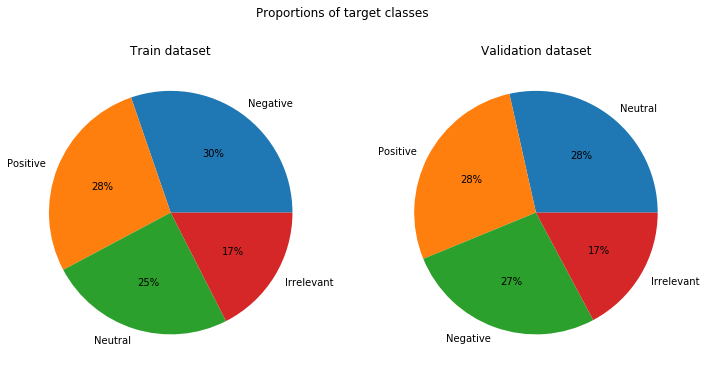

In [23]:
fig , ax = plt.subplots(1,2,figsize=(12,6))

ax[0].pie(train_data['Sentiment'].value_counts(),labels=train_data['Sentiment'].value_counts().index,autopct='%.f%%')
ax[1].pie(val_data['Sentiment'].value_counts(),labels=val_data['Sentiment'].value_counts().index,autopct='%.f%%')

fig.suptitle("Proportions of target classes")
ax[0].set_title("Train dataset")
ax[1].set_title("Validation dataset")

plt.show()

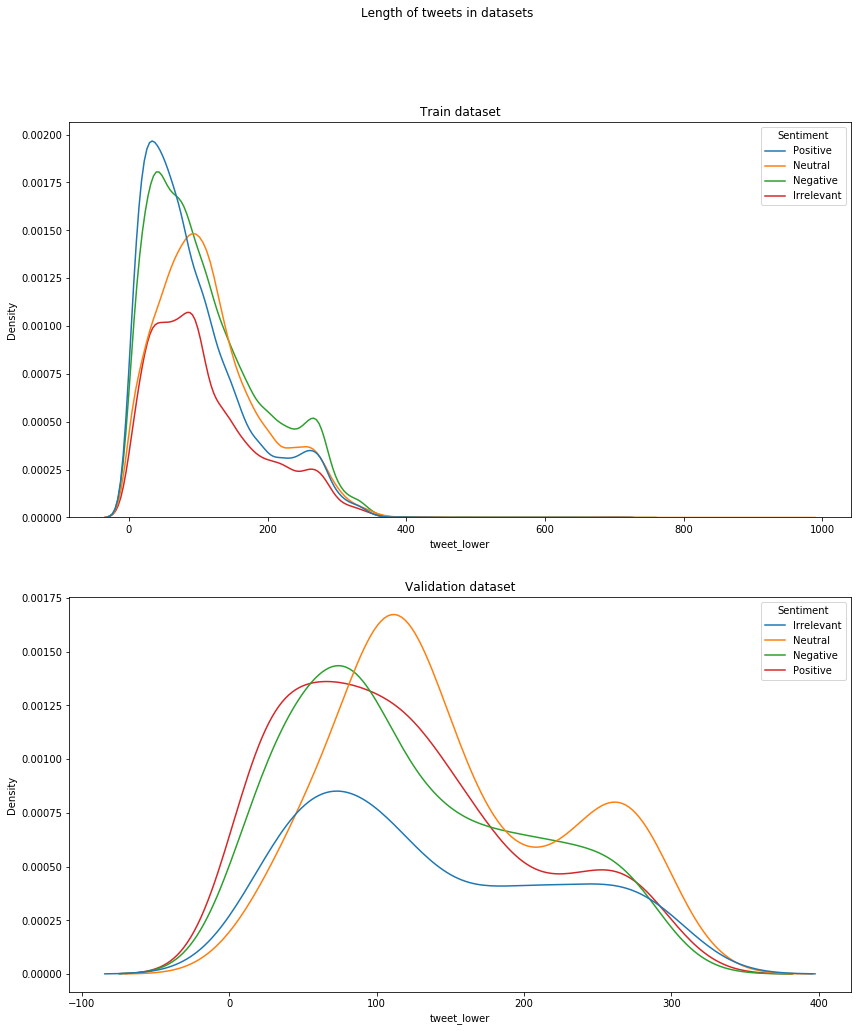

In [24]:
fig ,ax = plt.subplots(2,1,figsize=(14,16))

sns.kdeplot(data=train_data,x=(train_data['tweet_lower'].apply(lambda x: len(x))),hue='Sentiment',ax=ax[0])
sns.kdeplot(data=val_data,x=(val_data['tweet_lower'].apply(lambda x: len(x))),hue='Sentiment',ax=ax[1])

fig.suptitle("Length of tweets in datasets")
ax[0].set_title("Train dataset")
ax[1].set_title("Validation dataset")

plt.show()

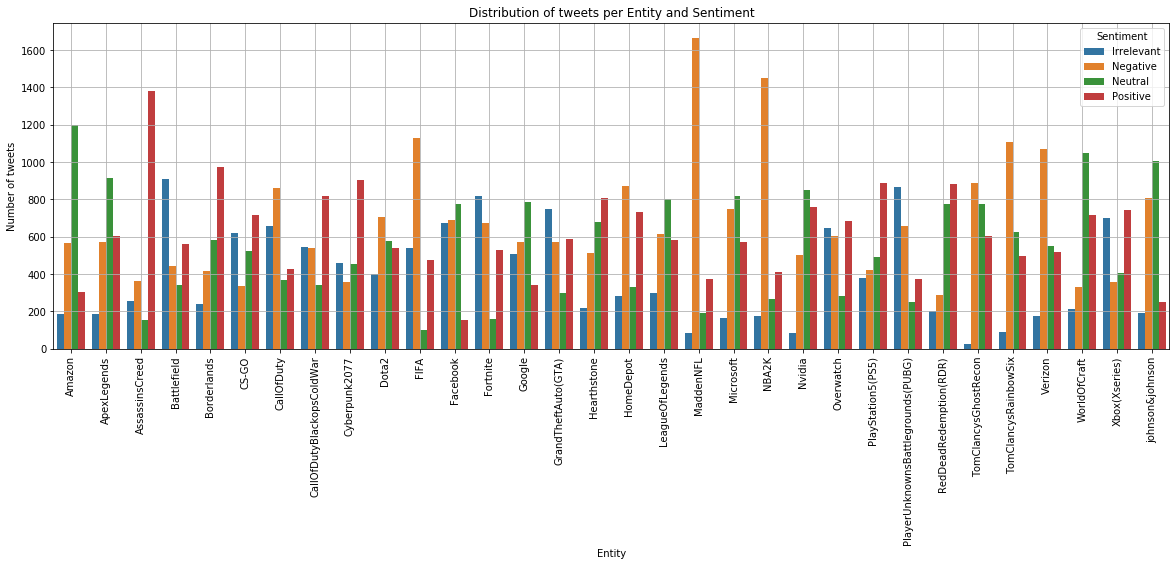

In [25]:
#Figure of comparison per Entity in training data
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="Entity",y="Tweet_ID",hue="Sentiment")
plt.xticks(rotation=90)
plt.xlabel("Entity")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Entity and Sentiment");

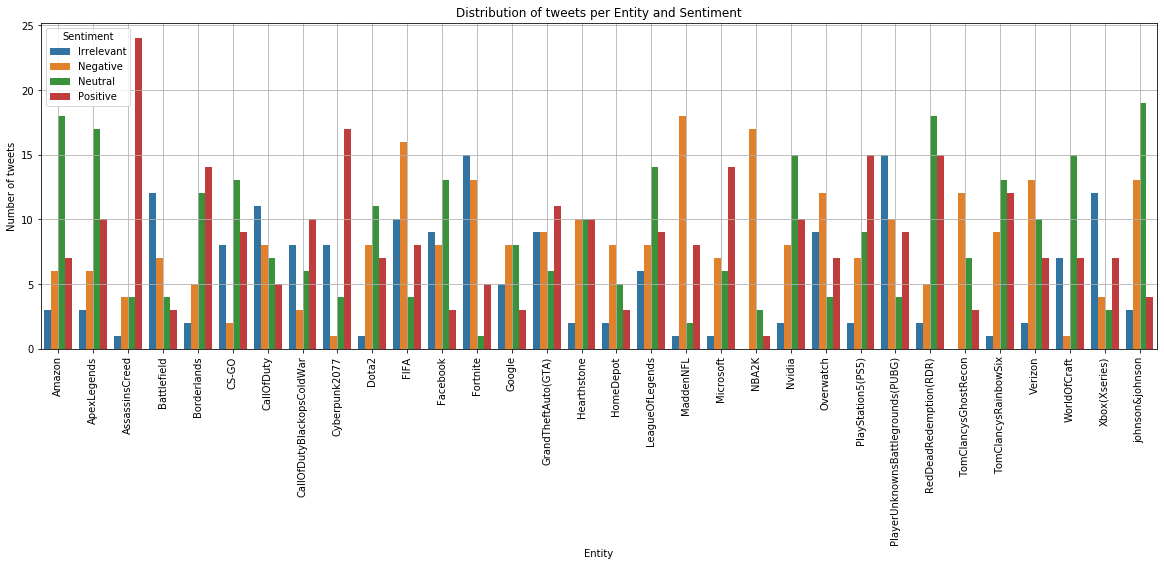

In [26]:
#Figure of comparison per Entity in validation data
plt.figure(figsize=(20,6))
sns.barplot(data=plot2,x="Entity",y="Tweet_ID",hue="Sentiment")
plt.xticks(rotation=90)
plt.xlabel("Entity")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Entity and Sentiment");

As an interesting fact, the number of modified texts coincides with the id. For this reason, as the ID is unique, the following barplot shows that for games such as MaddenNFL and NBA2K the number of negative tweets is the highest while on the other brands the trend is different.

# 3. Text analysis

With the clean text, the initial number of unique tokens was counted to identify the model complexity. As presented, there are more than 30 thousand unique words.

In [27]:
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train_data.tweet_lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30435


The tokens_text variable groups all the texts by the different words stored on a List.

In [28]:
tokens_text[1]

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

Also, the main English stopwords were saved on an additional variable, to be used in the following modeling.

In [29]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Modeling

## Bag of Words method
This method helps to classify and group the relevant data to help the model identify the proper trends.
On this first BoW, the stopwords were considered alongside a default ngram of 1.

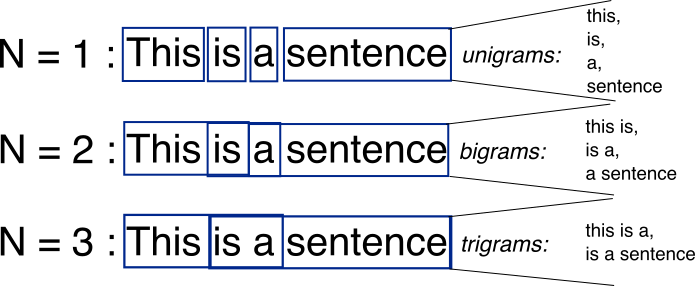

## Bag of words with ngram = 1

In [30]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

Then, the main data was split on train and test datasets alongside the encoding of the words by using the training dataset as a reference:

In [31]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [32]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.tweet_lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.tweet_lower)

C:\Users\meena\anaconda3\envs\environment\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [33]:
X_test_bow

<14332x28998 sparse matrix of type '<class 'numpy.int64'>'
	with 157933 stored elements in Compressed Sparse Row format>

In [34]:
#Labels for train and test encoding
y_train_bow = reviews_train['Sentiment']
y_test_bow = reviews_test['Sentiment']

In [35]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

Negative      0.300447
Positive      0.273723
Neutral       0.248953
Irrelevant    0.176877
Name: Sentiment, dtype: float64

The total number of tweets for each category shows that negative and positive are the most registered while the irrelevant is the lowest.

In [36]:
#Validation data
#X_val_bow

In [37]:
#Validation data fitting with bow ngram=1
X_val_bow = bow_counts.transform(val_data.tweet_lower)

y_val_bow = val_data['Sentiment']

## Logistic Regression with ngram = 1

In [38]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=1000)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)
print(classification_report(y_test_bow,test_pred))

Accuracy:  83.65196762489533
              precision    recall  f1-score   support

  Irrelevant       0.90      0.76      0.82      2535
    Negative       0.84      0.88      0.86      4306
     Neutral       0.89      0.80      0.84      3568
    Positive       0.76      0.88      0.82      3923

    accuracy                           0.84     14332
   macro avg       0.85      0.83      0.84     14332
weighted avg       0.84      0.84      0.84     14332



In [39]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)
print(classification_report(y_val_bow, Val_res))

Accuracy:  93.60000000000001
              precision    recall  f1-score   support

  Irrelevant       0.95      0.91      0.93       172
    Negative       0.93      0.95      0.94       266
     Neutral       0.96      0.93      0.95       285
    Positive       0.91      0.94      0.92       277

    accuracy                           0.94      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.94      0.94      0.94      1000



With this data, the Logistic Regression Model was trained, where accuracy of 84% on the test dataset was obtained while on the validation dataset this value increased to 93.6%.

## Random Forest Classifier with ngram = 1

In [40]:
# RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train_bow, y_train_bow)

# Prediction
test_pred = model1.predict(X_test_bow)

print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)
print(classification_report(y_test_bow,test_pred))

Accuracy:  90.99916271281049
              precision    recall  f1-score   support

  Irrelevant       0.97      0.85      0.90      2535
    Negative       0.92      0.93      0.93      4306
     Neutral       0.94      0.90      0.92      3568
    Positive       0.85      0.95      0.89      3923

    accuracy                           0.91     14332
   macro avg       0.92      0.90      0.91     14332
weighted avg       0.91      0.91      0.91     14332



In [41]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)
print(classification_report(y_val_bow, Val_res))

Accuracy:  95.7
              precision    recall  f1-score   support

  Irrelevant       0.99      0.92      0.95       172
    Negative       0.94      0.98      0.96       266
     Neutral       0.96      0.95      0.96       285
    Positive       0.95      0.96      0.96       277

    accuracy                           0.96      1000
   macro avg       0.96      0.95      0.96      1000
weighted avg       0.96      0.96      0.96      1000



## Multinomial NB with ngram = 1

In [42]:
model1 = MultinomialNB()
model1.fit(X_train_bow, y_train_bow)
#prediction
test_pred = model1.predict(X_test_bow)

print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)
print(classification_report(y_test_bow,test_pred))

Accuracy:  75.01395478649177
              precision    recall  f1-score   support

  Irrelevant       0.84      0.64      0.73      2535
    Negative       0.71      0.85      0.77      4306
     Neutral       0.83      0.66      0.74      3568
    Positive       0.71      0.79      0.75      3923

    accuracy                           0.75     14332
   macro avg       0.77      0.74      0.75     14332
weighted avg       0.76      0.75      0.75     14332



In [43]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)
print(classification_report(y_val_bow, Val_res))

Accuracy:  81.89999999999999
              precision    recall  f1-score   support

  Irrelevant       0.88      0.75      0.81       172
    Negative       0.78      0.87      0.83       266
     Neutral       0.87      0.75      0.81       285
    Positive       0.78      0.88      0.83       277

    accuracy                           0.82      1000
   macro avg       0.83      0.81      0.82      1000
weighted avg       0.83      0.82      0.82      1000



## Decision Tree with ngram = 1

In [44]:
model1 = DecisionTreeClassifier()
model1.fit(X_train_bow, y_train_bow)

#prediction
test_pred = model1.predict(X_test_bow)

print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)
print(classification_report(y_test_bow,test_pred))

Accuracy:  82.3681272676528
              precision    recall  f1-score   support

  Irrelevant       0.84      0.75      0.79      2535
    Negative       0.86      0.84      0.85      4306
     Neutral       0.84      0.81      0.83      3568
    Positive       0.77      0.86      0.82      3923

    accuracy                           0.82     14332
   macro avg       0.83      0.82      0.82     14332
weighted avg       0.83      0.82      0.82     14332



In [45]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)
print(classification_report(y_val_bow, Val_res))

Accuracy:  90.2
              precision    recall  f1-score   support

  Irrelevant       0.91      0.88      0.90       172
    Negative       0.89      0.93      0.91       266
     Neutral       0.94      0.87      0.90       285
    Positive       0.88      0.92      0.90       277

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



## Bag of words with ngram = 4

Finally, another Bag of Words was used. This had an n-gram of 4 while not classifying the stopwords, using all the available information.


In [46]:
#n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.tweet_lower)
X_test_bow = bow_counts.transform(reviews_test.tweet_lower)
#fitting the validation data with bow ngram=4
X_val_bow = bow_counts.transform(val_data.tweet_lower)

In [47]:
X_train_bow

<57324x1425894 sparse matrix of type '<class 'numpy.int64'>'
	with 4076770 stored elements in Compressed Sparse Row format>

## Logistic Regression with ngram=4

In [48]:
model2 = LogisticRegression(C=1, solver="liblinear",max_iter=1000)
# Logistic regression
model2.fit(X_train_bow, y_train_bow)
# Prediction
test_pred_2 = model2.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)

Accuracy:  91.42478370080937


In [49]:
print(classification_report(y_test_bow,test_pred_2))

              precision    recall  f1-score   support

  Irrelevant       0.97      0.86      0.91      2535
    Negative       0.91      0.94      0.93      4306
     Neutral       0.94      0.90      0.92      3568
    Positive       0.87      0.94      0.90      3923

    accuracy                           0.91     14332
   macro avg       0.92      0.91      0.91     14332
weighted avg       0.92      0.91      0.91     14332



In [50]:

Val_res = model2.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)
print(classification_report(y_val_bow, Val_res))

Accuracy:  98.8
              precision    recall  f1-score   support

  Irrelevant       0.99      0.98      0.99       172
    Negative       0.99      0.99      0.99       266
     Neutral       0.99      0.99      0.99       285
    Positive       0.98      0.99      0.98       277

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



## Random Forest with ngram=4

In [51]:
# RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train_bow, y_train_bow)

# Prediction
test_pred = model2.predict(X_test_bow)

print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)
print(classification_report(y_test_bow,test_pred))

Accuracy:  89.56879709740441
              precision    recall  f1-score   support

  Irrelevant       0.98      0.77      0.86      2535
    Negative       0.88      0.94      0.91      4306
     Neutral       0.90      0.89      0.90      3568
    Positive       0.87      0.93      0.90      3923

    accuracy                           0.90     14332
   macro avg       0.91      0.88      0.89     14332
weighted avg       0.90      0.90      0.89     14332



In [52]:
Val_res = model2.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)
print(classification_report(y_val_bow, Val_res))

Accuracy:  96.39999999999999
              precision    recall  f1-score   support

  Irrelevant       0.99      0.92      0.95       172
    Negative       0.95      0.98      0.97       266
     Neutral       0.95      0.97      0.96       285
    Positive       0.98      0.96      0.97       277

    accuracy                           0.96      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



## Multinomial NB with ngram=4

In [53]:
model2 = MultinomialNB()
model2.fit(X_train_bow, y_train_bow)
#prediction
test_pred = model2.predict(X_test_bow)

print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)
print(classification_report(y_test_bow,test_pred))

Accuracy:  91.65503767792352
              precision    recall  f1-score   support

  Irrelevant       0.98      0.85      0.91      2535
    Negative       0.87      0.96      0.91      4306
     Neutral       0.95      0.90      0.92      3568
    Positive       0.91      0.92      0.92      3923

    accuracy                           0.92     14332
   macro avg       0.93      0.91      0.92     14332
weighted avg       0.92      0.92      0.92     14332



In [54]:
Val_res = model2.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)
print(classification_report(y_val_bow, Val_res))

Accuracy:  97.6
              precision    recall  f1-score   support

  Irrelevant       0.99      0.96      0.98       172
    Negative       0.98      0.99      0.99       266
     Neutral       0.98      0.97      0.98       285
    Positive       0.95      0.98      0.97       277

    accuracy                           0.98      1000
   macro avg       0.98      0.97      0.98      1000
weighted avg       0.98      0.98      0.98      1000



## Decision Tree with ngram=4

In [55]:
model2 = DecisionTreeClassifier()
model2.fit(X_train_bow, y_train_bow)

#prediction
test_pred = model2.predict(X_test_bow)

print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)
print(classification_report(y_test_bow,test_pred))

Accuracy:  77.31649455763326
              precision    recall  f1-score   support

  Irrelevant       0.76      0.67      0.71      2535
    Negative       0.79      0.81      0.80      4306
     Neutral       0.76      0.78      0.77      3568
    Positive       0.77      0.79      0.78      3923

    accuracy                           0.77     14332
   macro avg       0.77      0.76      0.77     14332
weighted avg       0.77      0.77      0.77     14332



In [56]:
Val_res = model2.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)
print(classification_report(y_val_bow, Val_res))

Accuracy:  90.2
              precision    recall  f1-score   support

  Irrelevant       0.90      0.87      0.88       172
    Negative       0.89      0.92      0.91       266
     Neutral       0.91      0.92      0.91       285
    Positive       0.90      0.88      0.89       277

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

